In [1]:
import pandas as pd 
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Data Wrangling

# Step1 : Gathering Data 

In [2]:
# load the twitter-archive-enhanced.csv file into a DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# programmatically download the image_predictions.tsv file using the Requests library and open it into a DataFrame
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', mode ='wb') as file:
      file.write(response.content)

        
image_predications = pd.read_csv('image_predictions.tsv', sep='\t')
image_predications.head()



,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
## load json file :
tweets = pd.read_json('tweet-json.txt', lines=True)
tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


***

# Step2: Assessing Data
### 1)`df_twitter_archive`

In [5]:
# make a copy of original dataframe
df_twitter_archive = twitter_archive.copy()

In [6]:
# display first five rows of dataframe
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
#display the dataframe dimensionality.
df_twitter_archive.shape

(2356, 17)

> There are 2356 rows and 11 columns

In [8]:
#display random sample of the datframe 
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1073,739932936087216128,NaN,NaN,2016-06-06 21:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Rorie. She's zen af. Just enjoyin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739932936...,10,10,Rorie,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
675,789530877013393408,NaN,NaN,2016-10-21 18:16:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzy. She smiles a lot. 12/10 contagi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789530877...,12,10,Rizzy,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None
308,835574547218894849,NaN,NaN,2017-02-25 19:37:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eli. He works backstage at Bone Jovi c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835574547...,11,10,Eli,None,None,None,None
312,835264098648616962,NaN,NaN,2017-02-24 23:04:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. Her hobbies include being precious ...,NaN,NaN,NaN,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,None,None,None,None
1631,684481074559381504,NaN,NaN,2016-01-05 21:06:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pippa. She's an Elfin High Feta. Compact ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684481074...,10,10,Pippa,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @SchafeBacon2016: @dog_rates Slightly distu...,8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836...,11,10,None,None,None,None,None


> In one of the random sample I noticed that there is incorrect name like: a , an , just, the, not (The wrong words are written in lowercase) 

In [9]:
# display a basic summary of the dataframe
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

>Erroneous datatype: timestamp(datetime) , tweet_id (str)  
  The dog stage is in different columns need to be in one

In [10]:
# check for missing data 
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

> There are missing values (NaN) in these columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

In [11]:
# check for duplicate rows
df_twitter_archive.duplicated().sum()

0

In [12]:
#display summary statistics of the numeric variables in the dataframe
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> Maximum rating_numerator is 1776 and maximum rating_denominator is 170!   
which is invalid data.

### 2)`df_image_predications`

In [13]:
# make a copy of original dataframe
df_image_predications = image_predications.copy()

In [14]:
# display first five rows of dataframe
df_image_predications.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
#display random sample of the datframe 
df_image_predications.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1590,798644042770751489,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
1101,720785406564900865,https://pbs.twimg.com/media/CgC-gMCWcAAawUE.jpg,1,Chihuahua,0.896422,True,dingo,0.027929,False,kelpie,0.017916,True
1951,863432100342583297,https://pbs.twimg.com/media/C_uG6eAUAAAvMvR.jpg,1,Staffordshire_bullterrier,0.690517,True,French_bulldog,0.103360,True,beagle,0.079489,True
396,673656262056419329,https://pbs.twimg.com/media/CVlOy3pW4AQ9H1K.jpg,1,bull_mastiff,0.700625,True,Rhodesian_ridgeback,0.094698,True,Brabancon_griffon,0.057559,True


In [16]:
# display a basic summary of the dataframe
df_image_predications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


  > Erroneous datatype:  tweet_id  

In [17]:
# check for missing data 
df_image_predications.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
# check for duplicate rows
df_image_predications.duplicated().sum()

0

In [19]:
#display summary statistics of the numeric variables in the dataframe
df_image_predications.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### 3)`df_tweets`

In [20]:
# make a copy of original dataframe
df_tweets = tweets.copy()

In [21]:
# display first five rows of dataframe
df_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [22]:
#display random sample of the datframe 
df_tweets.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2190,2015-11-23 23:23:31+00:00,668932921458302977,668932921458302976,This is Herald. He likes to swing. Subtle tong...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668932892672851968, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,284,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
485,2016-12-29 17:54:58+00:00,814530161257443328,814530161257443328,This is Alf. Someone just rubbed a balloon on ...,False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 814530153418203136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,9629,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
118,2017-05-31 04:27:59+00:00,869772420881756160,869772420881756160,"This is Dewey (pronounced ""covfefe""). He's hav...",False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 869772408907071492, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,43710,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
375,2017-02-05 01:04:17+00:00,828046555563323392,828046555563323392,This is Sailer. He waits on the roof for his o...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 828046540409180160, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12923,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
816,2016-08-30 22:04:05+00:00,770743923962707968,770743923962707968,RT @dog_rates: Here's a doggo blowing bubbles....,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Sat Jun 04 23:31:25 +0000 2016...,NaN,NaN,NaN


>  column name in df_tweets dataframe need to be changed to be as the other two dataframes to merge them later: (id)

In [23]:
# display a basic summary of the dataframe
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

> Erroneous datatype: id (str)

In [24]:
# check for missing data 
df_tweets.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

> There are missing values (NaN) in these columns: extended_entities,in_reply_to_status_id,in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, geo, coordinates, place, contributors, possibly_sensitive, possibly_sensitive_appealable,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status.
In 16 columns

In [25]:
#display summary statistics of the numeric variables in the dataframe
df_tweets.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


#  Issues
## Quality: 
#### `df_twitter_archive`  
- **Missing values (NaN)**: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls   
- **Erroneous datatype**: timestamp (datetime) , tweet_id (str)
- **Incorrect dog name** like: a , an , just, the, not (The wrong words are written in lowercase) and None means the tweets not dogs 
- **Invalid values** for numerator and denominator

  




#### `df_image_predications` 
- **Erroneous datatype**: tweet_id
 

#### `df_tweets`
- **Erroneous datatype**: id (str)
- **Missing values (NaN)** in 16 columns


## Tidiness: 

1- 3 separate DataFrames that need to be merged.

2- column name in **df_tweets** dataframe need to be changed to be as the other two dataframes to merge them later: (id).

3- The dog stage in **df_twitter_archive** DataFrame is in 4 different columns need to be in one.

***

# Step3: Cleaning Data
## Issue 1

#### Define
Drop all missing values (NaN)for `df_twitter_archive` and `df_tweets`:
- `df_twitter_archive`: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls  
- `df_tweets`: extended_entities,in_reply_to_status_id,in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, geo, coordinates, place, contributors, possibly_sensitive, possibly_sensitive_appealable,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status.  

#### Code

In [26]:
# remove the columns that have missing values using .dropna
df_twitter_archive.dropna(how= 'any', axis=1, inplace=True)
df_tweets.dropna(how= 'any', axis=1, inplace=True)

#### Test

In [27]:
#check for missing value in df_twitter_archive
df_twitter_archive.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [28]:
#check for missing value in df_tweets
df_tweets.isnull().sum()

created_at            0
id                    0
id_str                0
full_text             0
truncated             0
display_text_range    0
entities              0
source                0
user                  0
is_quote_status       0
retweet_count         0
favorite_count        0
favorited             0
retweeted             0
lang                  0
dtype: int64


## Issue 2

#### Define
Convert the datatypes into an appropriate datatypes in all DataFrames.
- `df_twitter_archive`: timestamp (datetime) , tweet_id (str)    


- `df_image_predications`: tweet_id (str)  


- `df_tweets`: id (str)

#### Code  
 

In [29]:
#convert data types into string 
def convert_str(df,col):
    """
    Convert datatypes into string.

    Args:
        (str) df - dataframe in which the column whose data type is to be converted is located
        (str) col - the column whose data type is to be converted
        
    Returns:
        str - columns with (str) datatypes
    """
    df[[col]] = df[[col]].astype(str)
    
    

convert_str(df_twitter_archive, 'tweet_id') 
convert_str(df_image_predications, 'tweet_id') 
convert_str(df_tweets, 'id') 


In [30]:
#convert data types into datetime64 
df_twitter_archive['timestamp'] = df_twitter_archive['timestamp'].astype('datetime64[ns, UTC]')    

#### Test

In [31]:
#check for df_twitter_archive datatypes
df_twitter_archive.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

In [32]:
#check for df_image_predications datatypes
df_image_predications.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [33]:
#check for df_tweets datatypes
df_tweets.dtypes

created_at            datetime64[ns, UTC]
id                                 object
id_str                              int64
full_text                          object
truncated                            bool
display_text_range                 object
entities                           object
source                             object
user                               object
is_quote_status                      bool
retweet_count                       int64
favorite_count                      int64
favorited                            bool
retweeted                            bool
lang                               object
dtype: object


## Issue 3

#### Define
 Drop **incorrect** dog names like: a , an , just, the, not (The wrong words are written in lowercase) and **None** in `df_twitter_archive`.
 
[I followed this way](https://knowledge.udacity.com/questions/659332)

#### Code  
 

In [34]:
#display the counts of unique values in names
df_twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
               ... 
Shawwn            1
Dudley            1
Sage              1
Alexanderson      1
Daniel            1
Name: name, Length: 957, dtype: int64

In [35]:
#check for all names in lowercase letter in df_twitter_archive using .islower()
lower_letter = df_twitter_archive['name'].str.islower()
lower_letter

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352     True
2353     True
2354     True
2355    False
Name: name, Length: 2356, dtype: bool

In [36]:
# select only the rows of lower_letter (.loc[]) then get index
df_twitter_archive.loc[lower_letter].index

Int64Index([  22,   56,  118,  169,  193,  335,  369,  542,  649,  682,
            ...
            2335, 2345, 2346, 2347, 2348, 2349, 2350, 2352, 2353, 2354],
           dtype='int64', length=109)

In [37]:
#drop these rows from the dataframe
df_twitter_archive = df_twitter_archive.drop(df_twitter_archive.loc[lower_letter].index)

In [38]:
#select all the rows that names are NOT lowercase 
dropped_2 = df_twitter_archive[~df_twitter_archive['name'].str.islower()]

#is the result same? assumed to be True
dropped_2.equals(df_twitter_archive)

True

In [39]:
#now we'll drop 'None', from the name column
df_twitter_archive.drop(df_twitter_archive[df_twitter_archive['name'] == 'None' ].index, inplace = True)

#### Test

In [40]:
# check if any names are lowercase? assumed to be 0
sum(df_twitter_archive['name'].str.islower())

0

In [41]:
#display number of rows in the dataframe decreased
df_twitter_archive.shape[0]

1502

In [42]:
#check if the lowercase and None names are removed
df_twitter_archive.name.value_counts()

Charlie    12
Oliver     11
Cooper     11
Lucy       11
Penny      10
           ..
Joshwa      1
Kona        1
Rilo        1
Willie      1
Laela       1
Name: name, Length: 931, dtype: int64


## Issue 4

#### Define
The dog stages in **df_twitter_archive** DataFrame is in 4 different columns need to be in one. So, we'll join these 4 columns in one column called 'dog_stage'
#### Code  
 

In [43]:
#first: we'll replace 'None' in the 4 columns with NaN value using .replace and np.nan
def replace_none(col):
    df_twitter_archive[col].replace('None', np.nan, inplace=True)
    """
    replace the word 'None' in the column with NaN values using np.nan .

    Args:
        (str) col - the column name that containing the 'None' word to be replaced with NaN values
        
    Returns:
        NaN values in the column
    """
    
replace_none('doggo')
replace_none('floofer')
replace_none('pupper')
replace_none('puppo')

#### Test

In [44]:
#check if the 'None' are replaced with NaN values
df_twitter_archive.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN


In [45]:
#now, we'll join the 4 columns in single column called 'dog_stage' using .join
cols = ['doggo', 'floofer', 'pupper', 'puppo']

df_twitter_archive['dog_stage'] = df_twitter_archive[cols].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

#### Test

In [46]:
#check if the column is created
df_twitter_archive.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN,


In [47]:
#after joining, there are many blanks in the column, which we'll replace it with the word 'None'
df_twitter_archive.replace(r'^\s*$', 'None', regex=True, inplace = True)

#### Test

In [48]:
#check if the blanks are filled by the word 'None' in dog_stage
df_twitter_archive.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN,None


In [49]:
#check the counts of unique values in dog_stage
df_twitter_archive.dog_stage.value_counts()

None            1298
pupper           130
doggo             45
puppo             20
floofer            5
doggo pupper       4
Name: dog_stage, dtype: int64

Here another issue appeared, which is the dog has two stages and that is invalid. It must be one stage for every single dog


## Issue 5

#### Define
The dog has two stages (doggo pupper ) and that is invalid it must be one stage for every single dog. So, we'll drop the 4 rows that have 2 stages.


#### Code  
 

In [50]:
#select the rows that have 'doggo pupper' value in dog_stage with its index 
invalid_stage = df_twitter_archive[df_twitter_archive['dog_stage'] == 'doggo pupper'].index

#drop these rows 
df_twitter_archive = df_twitter_archive.drop(df_twitter_archive.loc[invalid_stage].index)

In [51]:
#check the counts of unique values in dog_stage if there are two stages?
df_twitter_archive.dog_stage.value_counts()

None       1298
pupper      130
doggo        45
puppo        20
floofer       5
Name: dog_stage, dtype: int64


## Issue 6

#### Define
In Project Overview in Udacity it says:
> WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. **`These ratings almost always have a denominator of 10.`** 

But there are 2 rows with more than 10 rating denominator and one rows less. Which is an invalid issue so we must drop these rows. 

#### Code  
 

In [52]:
#check how many rating_denominator greater than 10
len(df_twitter_archive[df_twitter_archive['rating_denominator'] > 10]) 

2

In [53]:
#check how many rating_denominator less than 10
len(df_twitter_archive[df_twitter_archive['rating_denominator'] < 10])

1

In [54]:
#select the rows that have 'rating_denominator' more and less than 10 with its index 
index_denominator = df_twitter_archive[df_twitter_archive['rating_denominator'] > 10 ].index
index_denominator_less = df_twitter_archive[df_twitter_archive['rating_denominator'] < 10 ].index


#drop these rows 
df_twitter_archive.drop(index_denominator, inplace = True)
df_twitter_archive.drop(index_denominator_less, inplace = True)

#### Test

In [55]:
#check if there are any rating_denominator greater than 10?
len(df_twitter_archive[df_twitter_archive['rating_denominator'] > 10])

0

In [56]:
#check if there are any rating_denominator less than 10?
len(df_twitter_archive[df_twitter_archive['rating_denominator'] < 10])

0

In [57]:
#check the undf_twitter_archiveique values in rating_denominator
df_twitter_archive['rating_denominator'].unique()

array([10])


## Issue 7

#### Define
In Project Overview in Udacity it says:
> 'The numerators, though? **`Almost always greater than 10`**. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.'

There are 434 rows with rating_numerator more than 10 and 10 rows less than 10.

#### Code  
 

In [58]:
#check how many rating_numerator greater than 10
len(df_twitter_archive[df_twitter_archive['rating_numerator'] < 10])

258

In [59]:
#check how many rating_numerator less than 10
len(df_twitter_archive[df_twitter_archive['rating_numerator'] > 15])

4

In [60]:
#check the counts of unique values 
df_twitter_archive['rating_numerator'].value_counts()

12      380
11      344
10      285
13      203
9       102
8        74
7        33
14       21
6        17
5        14
3        10
4         5
2         3
75        2
27        1
1776      1
Name: rating_numerator, dtype: int64

In [61]:
df_twitter_archive[df_twitter_archive['rating_numerator'] == 75 ].head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
340,832215909146226688,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",75,10,Logan,NaN,NaN,NaN,NaN,None
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",75,10,Logan,NaN,NaN,NaN,NaN,None


After I checked for the the unique values manually by checking the tweet I noticed that there are some rating numerator were entered incorrectly. The index for these incorrect vales is 45(13.5 instead of 5) and 763(11.27 instead of 27). So, we'll replace these values with the correct one. 
Also, I noticed that the rating numerator less than 10 is almost not for dogs. So, we'll keep only the rating numerator from 10 to 14.

In [62]:
#replace the incorrect values with the correct one
df_twitter_archive.loc[45, 'rating_numerator'] = 13.5
df_twitter_archive.loc[763, 'rating_numerator'] = 11.27

In [63]:
df_twitter_archive#drop the rows that have rating_numerator less than 10 and greater than 14
df_twitter_archive.drop(df_twitter_archive[df_twitter_archive['rating_numerator'] < 10 ].index, inplace = True)
df_twitter_archive.drop(df_twitter_archive[df_twitter_archive['rating_numerator'] > 14 ].index, inplace = True)

#### Test

In [64]:
#check for the range of rating_numerator it must be between 10 to 14
df_twitter_archive.describe()

,rating_numerator,rating_denominator
count,1235.000000,1235.0
mean,11.458923,10.0
std,1.069777,0.0
min,10.000000,10.0
25%,11.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,14.000000,10.0


## Issue 8

#### Define
Column name in `df_tweets` dataframe need to be changed to be as the other two dataframes to merge them later. We'll change the column (id) to (tweet_id) using **.rename**.
#### Code  
 

In [65]:
#change the column (id) in 'df_tweets' dataframe to (tweet_id) using .rename
df_tweets.rename(columns={'created_at': 'timestamp',
                                    'id': 'tweet_id',
                                    'full_text': 'text'}, inplace=True)

#### Test

In [66]:
#display all columns name in 'df_tweets' dataframe using .columns to ensure that the id column changed to tweet_id
df_tweets.columns

Index(['timestamp', 'tweet_id', 'id_str', 'text', 'truncated',
       'display_text_range', 'entities', 'source', 'user', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'],
      dtype='object')

## Issue 9

#### Define
Merge all the 3 dataframes into one
#### Code  
 

In [67]:
#merge the 3 dataframes in one dataframe using .merge
master1 = pd.merge(df_twitter_archive, df_tweets, on='tweet_id', how='left')
master_df = pd.merge(master1, df_image_predications, on='tweet_id', how='left')

#### Test

In [68]:
#display the dataframe with first 5 rows
master_df.head()

,tweet_id,timestamp_x,source_x,text_x,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,NaN,NaN,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,NaN,NaN,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,NaN,NaN,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,NaN,NaN,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,NaN,NaN,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [69]:
#check for merged dataframe datatypes
master_df.dtypes

tweet_id                           object
timestamp_x           datetime64[ns, UTC]
source_x                           object
text_x                             object
rating_numerator                  float64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dog_stage                          object
timestamp_y           datetime64[ns, UTC]
id_str                            float64
text_y                             object
truncated                          object
display_text_range                 object
entities                           object
source_y                           object
user                               object
is_quote_status                    object
retweet_count                     float64
favorite_count                    float64
favorited                         

In [70]:
#check for missing values in merged dataframe
master_df.isnull().sum()

tweet_id                 0
timestamp_x              0
source_x                 0
text_x                   0
rating_numerator         0
rating_denominator       0
name                     0
doggo                 1193
floofer               1230
pupper                1136
puppo                 1216
dog_stage                0
timestamp_y              1
id_str                   1
text_y                   1
truncated                1
display_text_range       1
entities                 1
source_y                 1
user                     1
is_quote_status          1
retweet_count            1
favorite_count           1
favorited                1
retweeted                1
lang                     1
jpg_url                 97
img_num                 97
p1                      97
p1_conf                 97
p1_dog                  97
p2                      97
p2_conf                 97
p2_dog                  97
p3                      97
p3_conf                 97
p3_dog                  97
d


#  After mereging, I noticed issues:
## Quality: 

- There are missing values (NaN) 
- Erroneous datatype for retweet_count and favorite_count columns
- We only want original ratings without retweets

 


## Tidiness: 

- Unneeded columns.
- Need to extract month,day of week,hour from timestamp_x column.
- New columns to calculate dog rating.


## Issue 1

#### Define
We only want original ratings without retweets, so we'll drop all rows with RT. 

#### Code  
 

In [71]:
#find the text with 'RT' in 'text_x' column using .contains
len(master_df[master_df.text_x.str.contains('RT')])

110

In [72]:
#drop the rows with 'RT' using .drop
rt = master_df[master_df.text_x.str.contains('RT')].index
master_df = master_df.drop(master_df.loc[rt].index)

#### Test

In [73]:
#check if there are any rows in 'text_x' column with 'RT'
len(master_df[master_df.text_x.str.contains('RT')])

0


## Issue 2

#### Define
we need to calculate dog rating by dividing rating_numerator by rating_denominator and extracting month,day of week, hour, and date from timestamp_x coulmn.

#### Code  
 

In [74]:
#calculate the dog rating by dividing rating_numerator by rating_denominator and the result in new column 'dog_rating'
master_df['dog_rating'] = master_df['rating_numerator']/master_df['rating_denominator']

In [75]:
#extract hour, day of week, and date from timestamp_x column
def new_column(col):
    """
    extract hour, day of week, and date from timestamp_x column.

    Args:
        (str) col - the column that we want to extract the information from
        
    Returns:
        new columns for hour, day of week, and date of tweet
    """
    master_df.loc[:, 'tweet_hour'] = master_df.loc[:, col].dt.hour
    master_df.loc[:, 'tweet_month'] = master_df.loc[:, col].dt.month
    master_df.loc[:, 'tweet_year'] = master_df.loc[:, col].dt.year
    master_df.loc[:, 'tweet_dow'] = master_df.loc[:, col].dt.day_name()
    master_df.loc[:, 'tweet_date'] = master_df.loc[:, col].dt.date
    
    
new_column('timestamp_x')

#### Test

In [76]:
#check if the new columns are created using .columns
master_df.columns

Index(['tweet_id', 'timestamp_x', 'source_x', 'text_x', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stage', 'timestamp_y', 'id_str', 'text_y', 'truncated',
       'display_text_range', 'entities', 'source_y', 'user', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_rating', 'tweet_hour',
       'tweet_month', 'tweet_year', 'tweet_dow', 'tweet_date'],
      dtype='object')


## Issue 3

#### Define
we need to drop all columns **EXCEPT** ('tweet_hour','tweet_dow', 'tweet_month', 'tweet_date','name','dog_stage',
                              'dog_rating','retweet_count','favorite_count', 'p1','p1_dog')

#### Code  
 

In [77]:
master_df = master_df.loc[:, ['tweet_hour','tweet_dow', 'tweet_month','tweet_year', 'tweet_date','name','dog_stage',
                              'dog_rating','retweet_count','favorite_count', 'p1','p1_dog']]

#### Test

In [78]:
master_df.columns

Index(['tweet_hour', 'tweet_dow', 'tweet_month', 'tweet_year', 'tweet_date',
       'name', 'dog_stage', 'dog_rating', 'retweet_count', 'favorite_count',
       'p1', 'p1_dog'],
      dtype='object')


## Issue 4

#### Define
We need to convert data types for retweet_count, favorite_count and tweet_date columns
#### Code  
 

In [79]:
#check for the datatypes of master_df
master_df.dtypes

tweet_hour          int64
tweet_dow          object
tweet_month         int64
tweet_year          int64
tweet_date         object
name               object
dog_stage          object
dog_rating        float64
retweet_count     float64
favorite_count    float64
p1                 object
p1_dog             object
dtype: object

In [80]:
#convert the datatypes for tweet_date into (datetime64) and for retweet_count,favorite_count into (int) using .astype 
master_df['tweet_date'] = master_df['tweet_date'].astype('datetime64[ns]')
master_df['retweet_count'] = master_df['retweet_count'].astype('int')
master_df['favorite_count'] = master_df['favorite_count'].astype('int')

#### Test

In [81]:
#check if the datatypes are changed
master_df.dtypes

tweet_hour                 int64
tweet_dow                 object
tweet_month                int64
tweet_year                 int64
tweet_date        datetime64[ns]
name                      object
dog_stage                 object
dog_rating               float64
retweet_count              int64
favorite_count             int64
p1                        object
p1_dog                    object
dtype: object


## Issue 5

#### Define
There are NaN values so, we'll drop them.

#### Code  
 

In [82]:
#checking for missing values
master_df.isnull().sum()

tweet_hour         0
tweet_dow          0
tweet_month        0
tweet_year         0
tweet_date         0
name               0
dog_stage          0
dog_rating         0
retweet_count      0
favorite_count     0
p1                38
p1_dog            38
dtype: int64

In [83]:
#drop the missing values using .dropna
master_df.dropna(how='any', inplace=True)

#### Test

In [84]:
#checking if there are any missing values
master_df.isnull().sum()

tweet_hour        0
tweet_dow         0
tweet_month       0
tweet_year        0
tweet_date        0
name              0
dog_stage         0
dog_rating        0
retweet_count     0
favorite_count    0
p1                0
p1_dog            0
dtype: int64

In [85]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 0 to 1234
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_hour      1087 non-null   int64         
 1   tweet_dow       1087 non-null   object        
 2   tweet_month     1087 non-null   int64         
 3   tweet_year      1087 non-null   int64         
 4   tweet_date      1087 non-null   datetime64[ns]
 5   name            1087 non-null   object        
 6   dog_stage       1087 non-null   object        
 7   dog_rating      1087 non-null   float64       
 8   retweet_count   1087 non-null   int64         
 9   favorite_count  1087 non-null   int64         
 10  p1              1087 non-null   object        
 11  p1_dog          1087 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 110.4+ KB


#### Now, all issues are fixed and the dataframe become clean.  
#### we'll store the clean dataframe in a CSV file named `twitter_archive_master.csv`

In [86]:
# Save the master data into 'twitter_archive_master.csv':
master_df.to_csv('twitter_archive_master.csv')

# Data Analysis

## 1) In which year the average of retweet and favourites higher?

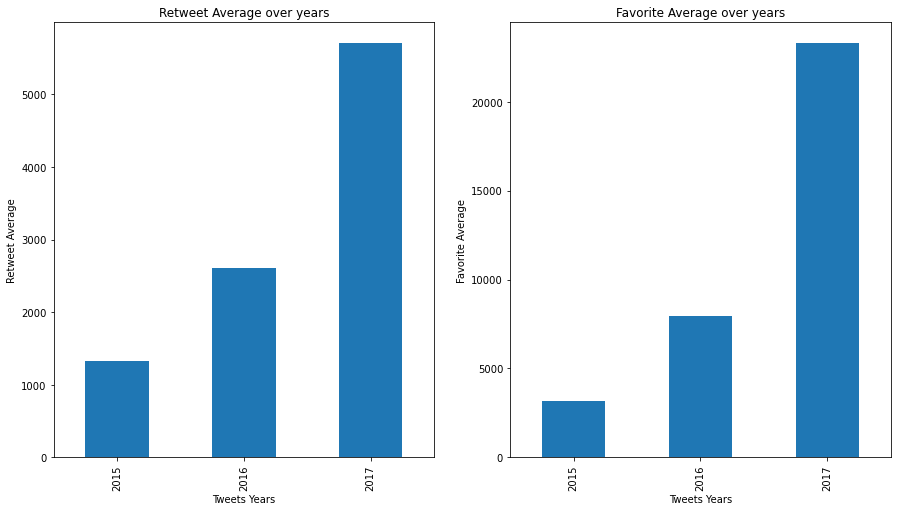

In [198]:
#group the tweet_year by retweet_count & favorite_count 
rt_year = master_df.groupby('tweet_year').retweet_count.mean()
fav_year = master_df.groupby('tweet_year').favorite_count.mean()


#plot side-by-side bar chart to visualize the average retweet & favorite by year
plt.subplot(1, 2, 1)
rt_year.plot(kind = 'bar',figsize=(15,8))
plt.xlabel('Tweets Years')
plt.ylabel('Retweet Average')
plt.title('Retweet Average over years');

plt.subplot(1, 2, 2) 
fav_year.plot(kind = 'bar', figsize=(15,8))
plt.xlabel('Tweets Years')
plt.ylabel('Favorite Average')
plt.title('Favorite Average over years');

> As we can see the average retweet and favorite are increase over years and the most average retweet and favorite were in 2017.

## 2) What is the percentage of correctness of the first prediction of the dog's breed image? And what is the most common breed?

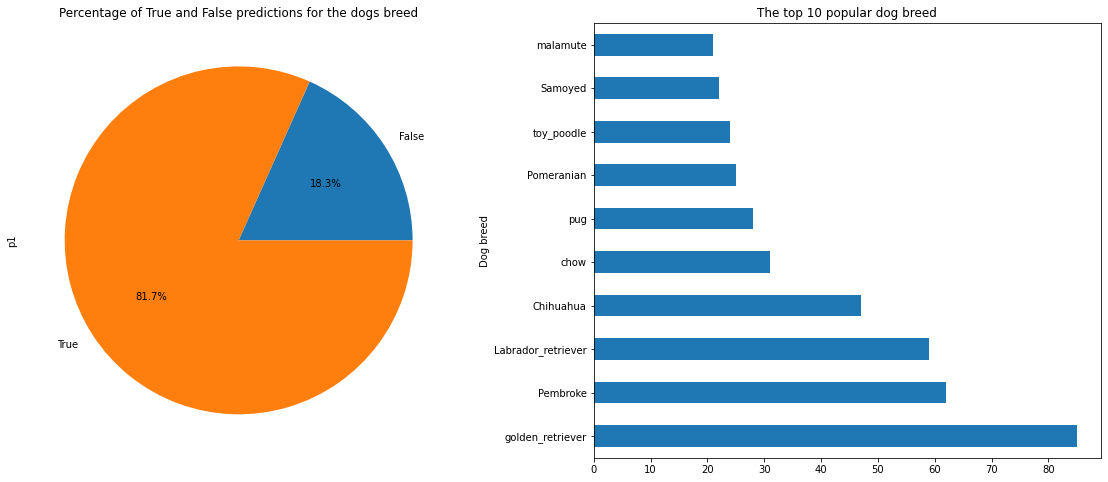

In [212]:
#count the number of True and False predictions for the dogs breed and plot it into pie chart 
plt.subplot(1, 2, 1)
prediction = master_df.groupby('p1_dog').p1.count()
prediction.plot(kind = 'pie', title="Percentage of True and False predictions for the dogs breed",
                figsize=(8, 8), autopct='%1.1f%%');


#from the True predictions we count the top 10 popular dog breed
plt.subplot(1, 2, 2) 
True_breed = master_df.query('p1_dog ==  True')
dog_breed = True_breed['p1'].value_counts()[:10]
dog_breed.plot.barh(figsize=(20, 8))
plt.ylabel('Dog breed')
plt.title('The top 10 popular dog breed');


> The True prediction is higher than False predictions by 81.7%. Among these 81.7%, Golden Retriever dog breed is the most popular dog breeds. 

## 3) Which dog stage has the most total retweet and which stage the lowest?

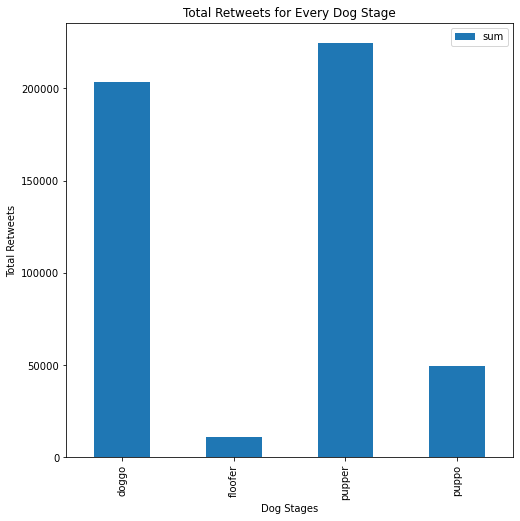

In [199]:
#we want the dog stage 'pupper', 'doggo', 'puppo'and 'floofer' only without 'None' so we'll filter the dataframe
# and select only rows that have these stages   
stage = ['pupper', 'doggo', 'puppo', 'floofer']
new_df = master_df[master_df['dog_stage'].isin(stage)]

#we'll sum retweets based on dog stages and plot a bar chart
total_rt = new_df.groupby('dog_stage').retweet_count.agg(['sum'])
total_rt.plot(kind='bar', figsize=(8, 8))
plt.xlabel('Dog Stages')
plt.ylabel('Total Retweets')
plt.title('Total Retweets for Every Dog Stage');

> This bar chart show that the dog stage that has the most total retweets is Pupper with more than 200,000 retweets while the dog stage that has the lowest total retweets is Floofer with less than 30,000.